In [1]:
#importing the library


import warnings

warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#loading the dataset
eeg_df=pd.read_csv('/kaggle/input/confused-eeg/EEG_data.csv')
info_df=pd.read_csv('/kaggle/input/confused-eeg/demographic_info.csv')

In [3]:
info_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [4]:
#getting information about the dataset
eeg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


In [5]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   subject ID  10 non-null     int64 
 1    age        10 non-null     int64 
 2    ethnicity  10 non-null     object
 3    gender     10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


# Merging DataFrame

In [6]:
info_df.rename(columns={'subject ID':'SubjectID'},inplace=True)

In [7]:
df=info_df.merge(right=eeg_df,on='SubjectID')

In [8]:
df

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SubjectID,12811.0,4.487394,2.865373,0.0,2.0,4.0,7.0,9.0
age,12811.0,25.409960,2.205148,24.0,24.0,25.0,25.0,31.0
VideoID,12811.0,4.390602,2.913232,0.0,2.0,4.0,7.0,9.0
Attention,12811.0,41.313871,23.152953,0.0,27.0,43.0,57.0,100.0
Mediation,12811.0,47.182656,22.655976,0.0,37.0,51.0,63.0,100.0
Raw,12811.0,65.570760,597.921035,-2048.0,-14.0,35.0,90.0,2047.0
Delta,12811.0,605785.261728,637623.562614,448.0,98064.0,395487.0,916623.0,3964663.0
Theta,12811.0,168052.602919,244134.569620,17.0,26917.5,81331.0,205276.0,3007802.0
Alpha1,12811.0,41384.350636,72430.815187,2.0,6838.0,17500.0,44779.5,1369955.0
Alpha2,12811.0,33183.393178,58314.100751,2.0,6852.0,14959.0,34550.5,1016913.0


# Data Preprocessing

In [10]:
df=df.drop(['SubjectID','VideoID','predefinedlabel'],axis=1)

In [11]:
df

,age,ethnicity,gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,25,Han Chinese,M,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,25,Han Chinese,M,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,25,Han Chinese,M,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,25,Han Chinese,M,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,25,Han Chinese,M,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,F,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0
12807,24,Han Chinese,F,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0
12808,24,Han Chinese,F,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0
12809,24,Han Chinese,F,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0


In [12]:
df.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [13]:
df.rename(columns={' age':'age', ' ethnicity':'ethnicity', ' gender':'gender', 
       
     },inplace=True)

In [14]:
df.columns

Index(['age', 'ethnicity', 'gender', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'user-definedlabeln'],
      dtype='object')

In [15]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [16]:
df['gender']=df['gender'].apply(lambda x:1 if x=='M' else 0)

In [17]:
df['ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [18]:
def get_dummies(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [19]:
df=get_dummies(df,'ethnicity')
df

,age,gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,False,False,True
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,False,False,True
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,False,False,True
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,False,False,True
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0,False,False,True
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0,False,False,True
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0,False,False,True
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0,False,False,True


In [20]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype('int')

In [21]:
df

,age,gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0,0,0,1
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0,0,0,1
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0,0,0,1
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0,0,0,1


In [22]:
df=df.rename(columns={'user-definedlabeln':"Label"})

In [23]:
categorical_features=['Age','Gender','Bengali','English','Han Chinese']

continuous_features=[item for item in df.columns if item not in categorical_features]

In [24]:
continuous_features

['age',
 'gender',
 'Attention',
 'Mediation',
 'Raw',
 'Delta',
 'Theta',
 'Alpha1',
 'Alpha2',
 'Beta1',
 'Beta2',
 'Gamma1',
 'Gamma2',
 'Label']

In [25]:
continuous_features

['age',
 'gender',
 'Attention',
 'Mediation',
 'Raw',
 'Delta',
 'Theta',
 'Alpha1',
 'Alpha2',
 'Beta1',
 'Beta2',
 'Gamma1',
 'Gamma2',
 'Label']

In [26]:
df[continuous_features]

,age,gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0


# Univariant Analysis

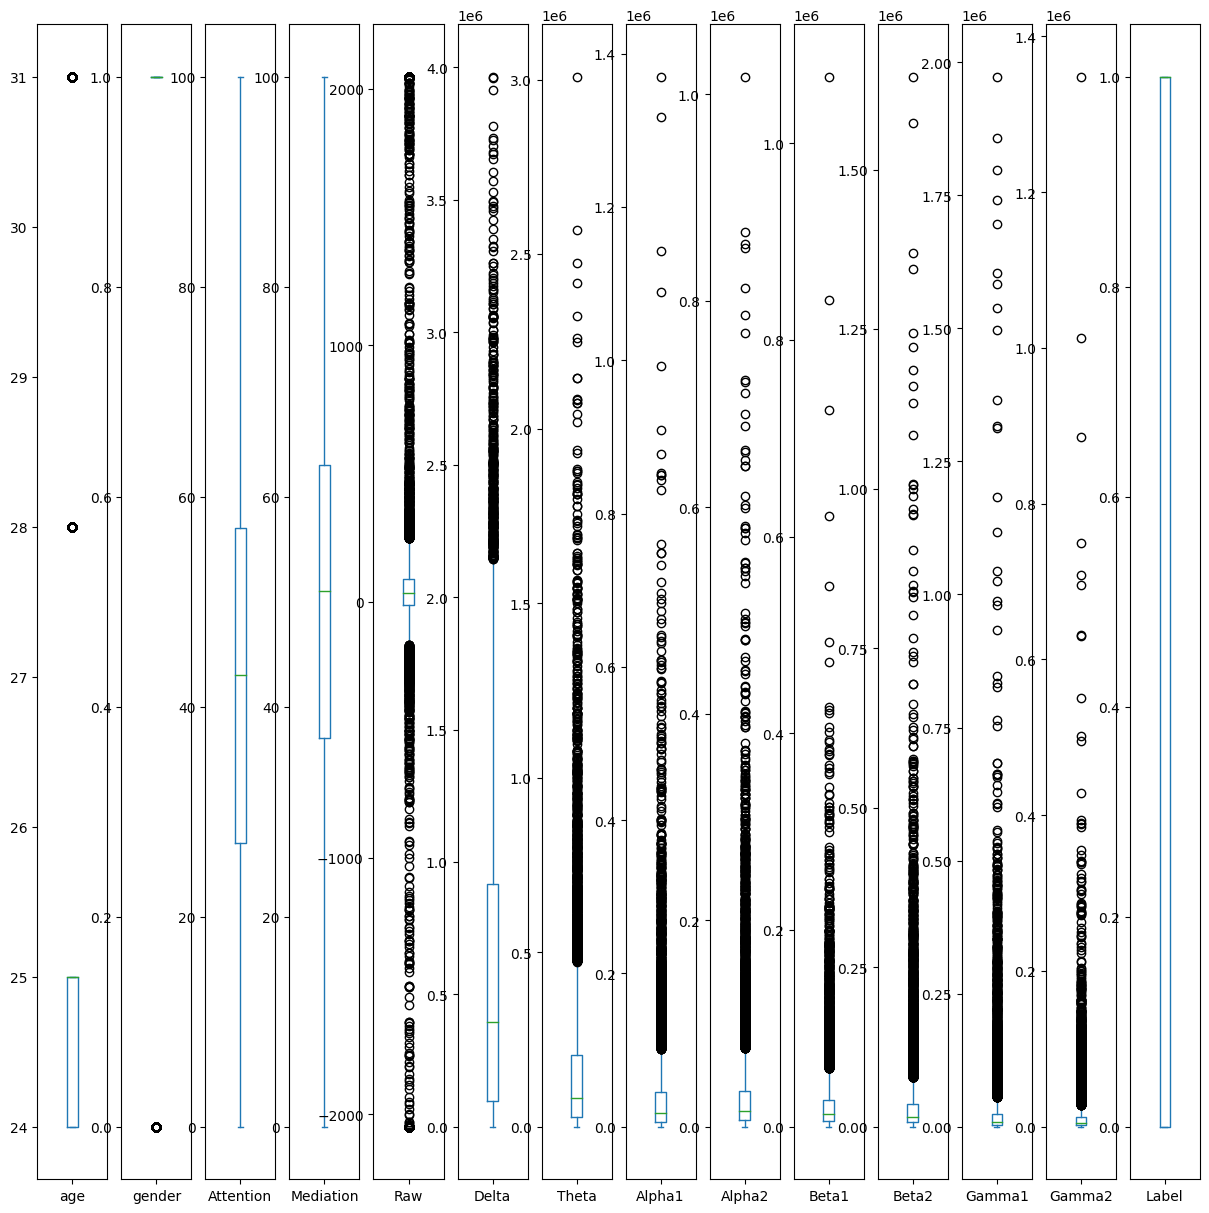

In [27]:
df[continuous_features].plot(kind='box',figsize=(15,15),subplots=True)
plt.show()

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

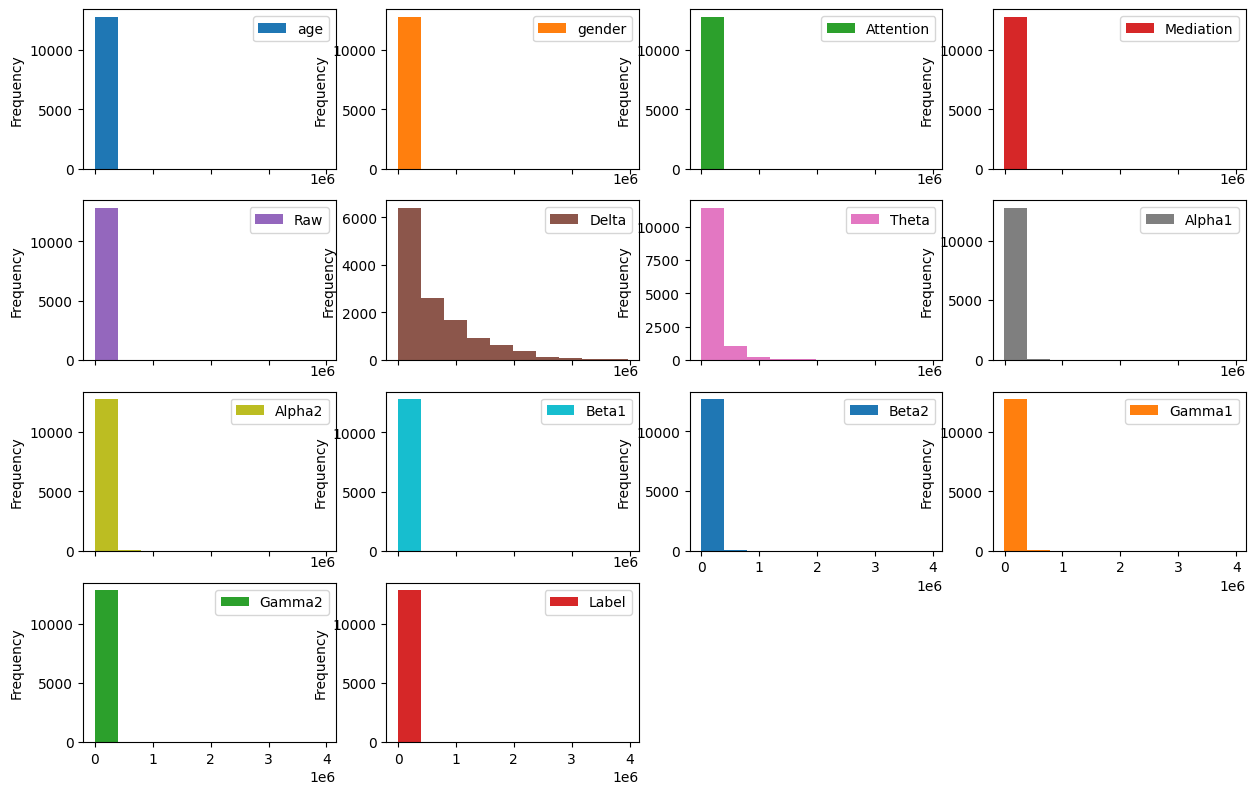

In [28]:
df[continuous_features].plot(kind='hist',figsize=(15,12),subplots=True,layout=(5,4))

In [29]:
df.columns

Index(['age', 'gender', 'Attention', 'Mediation', 'Raw', 'Delta', 'Theta',
       'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'Label',
       'Bengali', 'English', 'Han Chinese'],
      dtype='object')

In [30]:
df.rename(columns={'age':'Age','gender':'Gender'},inplace=True)

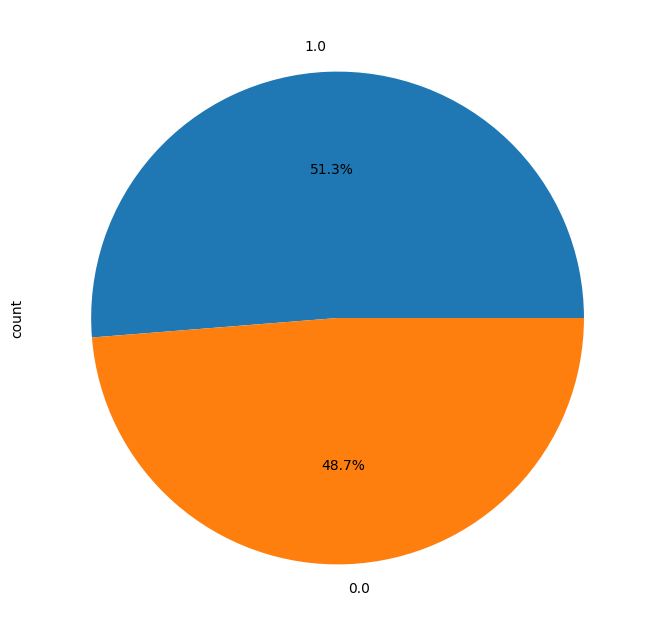

In [31]:
plt.figure(figsize=(8,8))
df['Label'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.show()

# Multivariant Analysis

In [32]:
index=continuous_features.index('age')
continuous_features[index]='Age'
index=continuous_features.index('gender')
continuous_features[index]='Gender'

In [33]:
continuous_features

['Age',
 'Gender',
 'Attention',
 'Mediation',
 'Raw',
 'Delta',
 'Theta',
 'Alpha1',
 'Alpha2',
 'Beta1',
 'Beta2',
 'Gamma1',
 'Gamma2',
 'Label']

<Figure size 2000x2000 with 0 Axes>

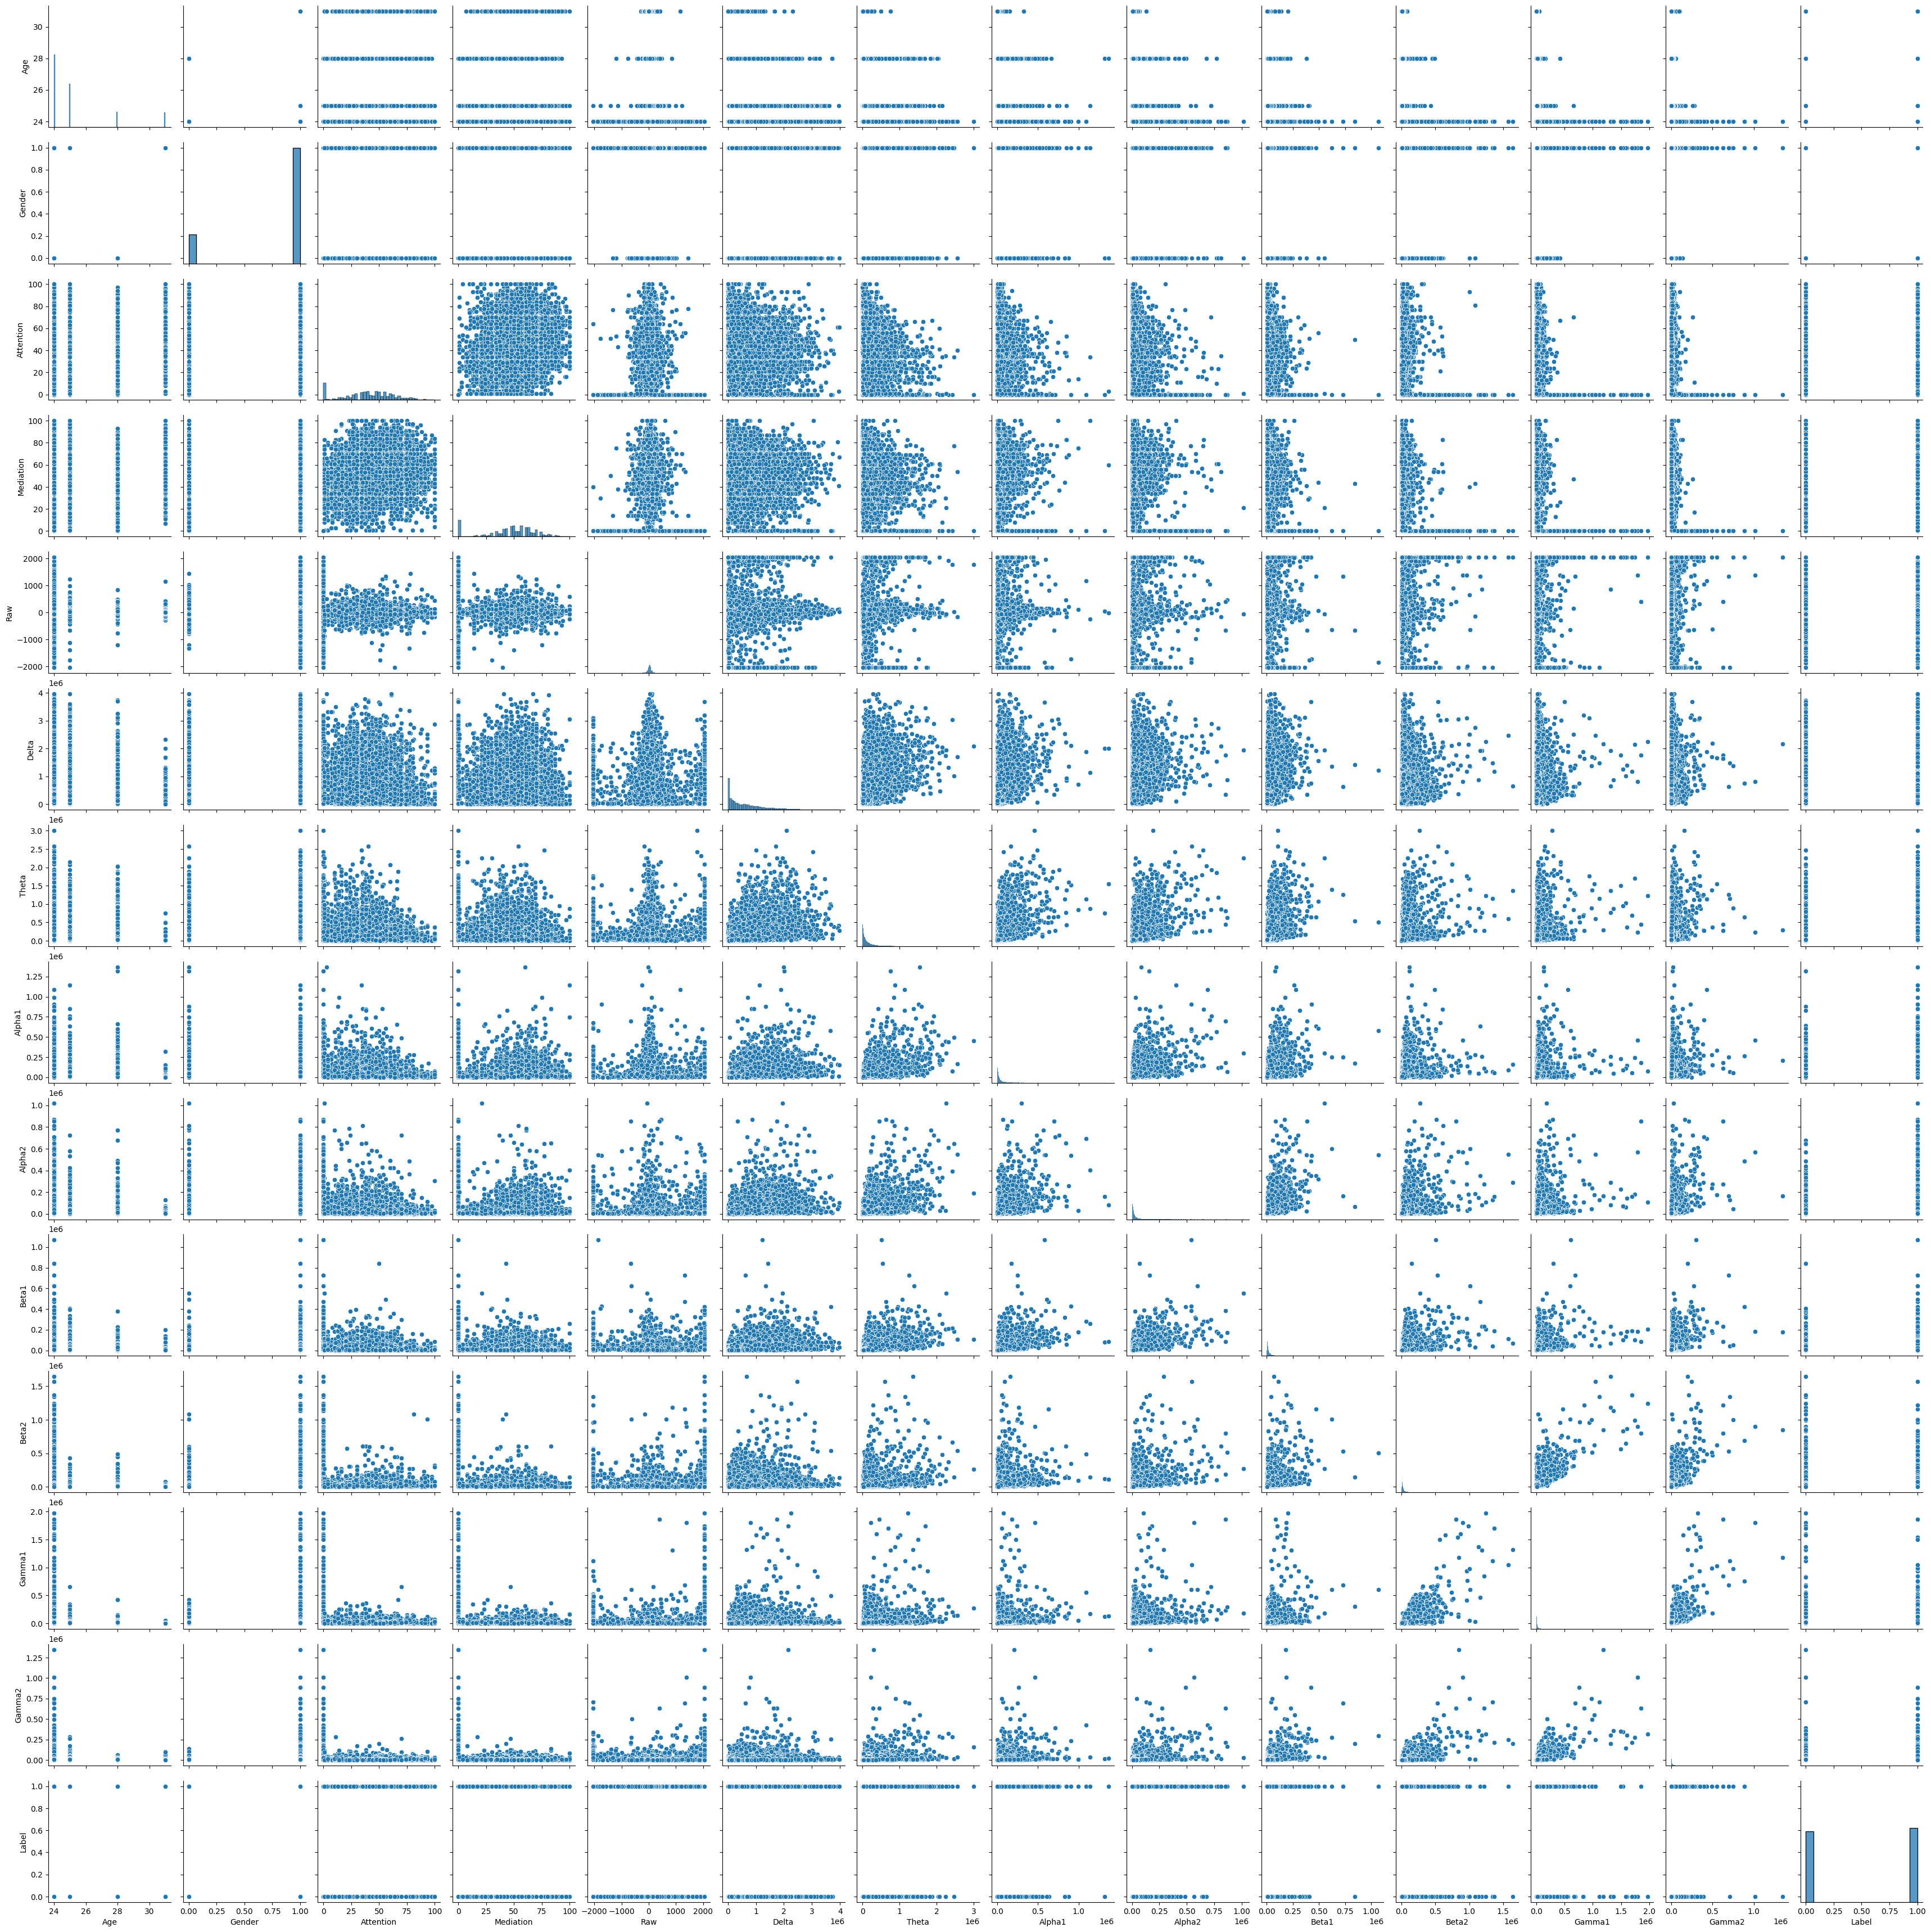

In [34]:
plt.figure(figsize=(20,20))
sns.pairplot(df[continuous_features])
plt.show()

In [35]:
df

,Age,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label,Bengali,English,Han Chinese
0,25,1,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0,0,1
1,25,1,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0,0,1
2,25,1,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0,0,1
3,25,1,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0,0,1
4,25,1,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,0.0,0,0,1
12807,24,0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,0.0,0,0,1
12808,24,0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,0.0,0,0,1
12809,24,0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,0.0,0,0,1


# Correlation Matrix

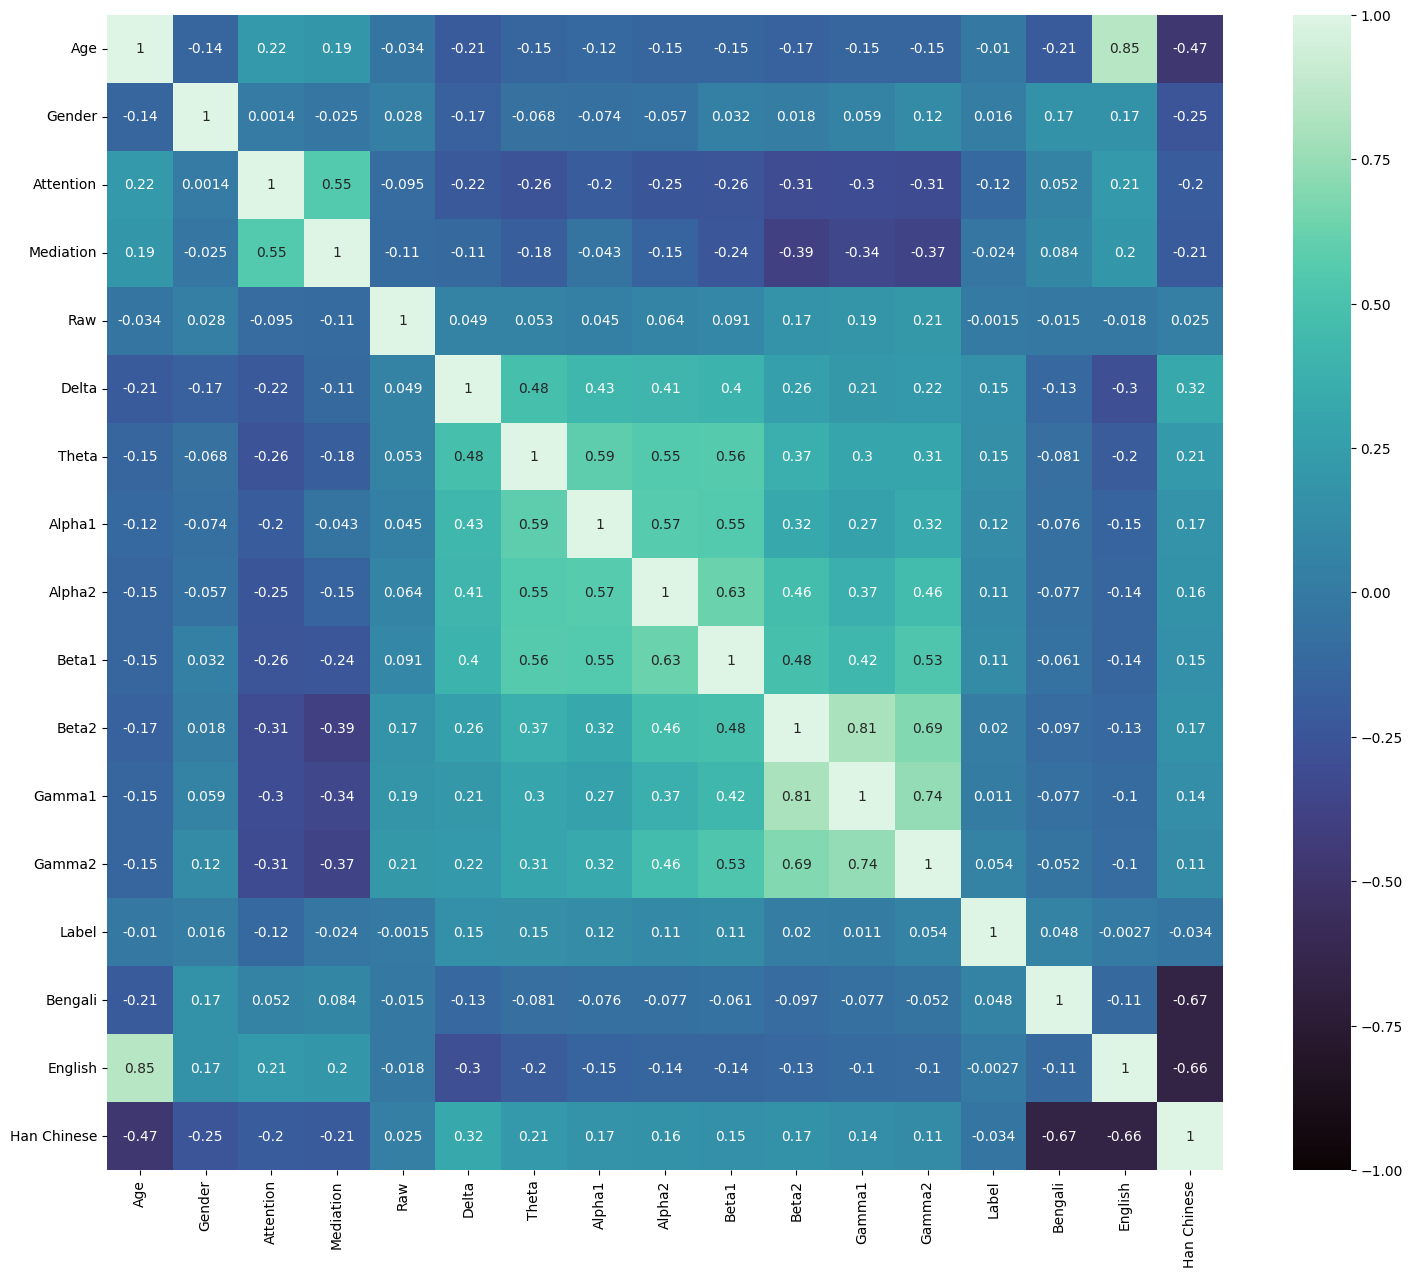

In [39]:
corr=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=-1,cmap='mako')
plt.show()

In [40]:
y=df['Label']
x=df.drop('Label',axis=1)

scaler=StandardScaler()

x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123)

In [41]:
x_train.shape

(8967, 16)

# Training Model

In [49]:
inputs=tf.keras.Input(shape=(16,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [50]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
batch_size=32
epochs=50
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs,callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5625 - auc: 0.5905 - loss: 0.6823 - val_accuracy: 0.6466 - val_auc: 0.6853 - val_loss: 0.6393 - learning_rate: 0.0010
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6420 - auc: 0.6925 - loss: 0.6342 - val_accuracy: 0.6276 - val_auc: 0.6826 - val_loss: 0.6398 - learning_rate: 0.0010
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6400 - auc: 0.6897 - loss: 0.6355 - val_accuracy: 0.6405 - val_auc: 0.6968 - val_loss: 0.6311 - learning_rate: 0.0010
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - auc: 0.6960 - loss: 0.6301 - val_accuracy: 0.6505 - val_auc: 0.7000 - val_loss: 0.6282 - learning_rate: 0.0010
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6530 - auc: 0.7104 - loss: 0.6207 - val_accuracy: 0.6499 - val_auc: 0.7089 - val_loss: 0.6231 - learning_rate: 0.0010
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6564 - auc: 0.

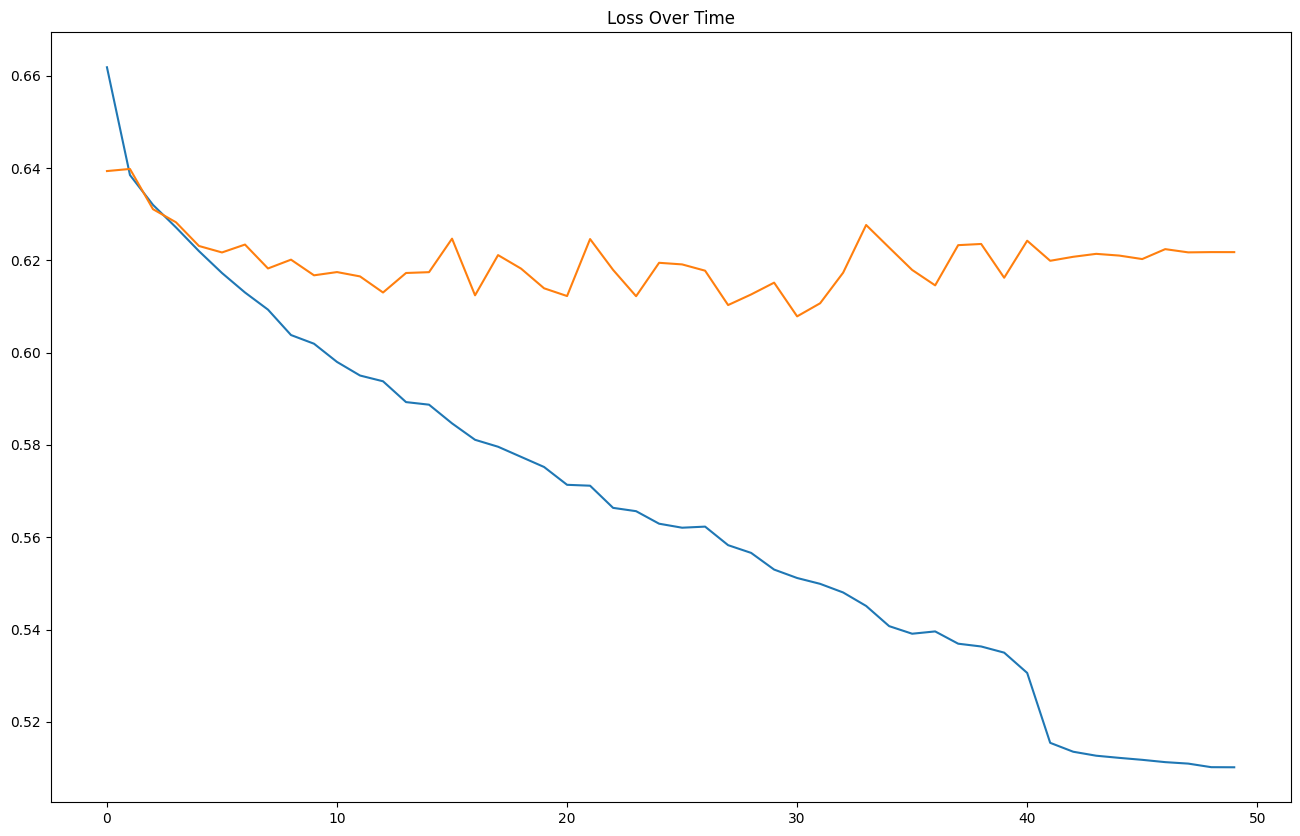

In [51]:
plt.figure(figsize=(16,10))
plt.plot(range(epochs),history.history['loss'],label='Training Loss')

plt.plot(range(epochs),history.history['val_loss'],label='Validation Loss')
plt.title('Loss Over Time')
plt.show()


In [52]:
model.evaluate(x_test,y_test)

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6724 - auc: 0.7361 - loss: 0.6350


[0.6279464364051819, 0.6701352596282959, 0.7371959686279297]

In [53]:
y_true=np.array(y_test)
y_pred=np.squeeze(model.predict(x_test))
y_pred

121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([0.8672263 , 0.23471758, 0.00322319, ..., 0.44001314, 0.2488803 ,
       0.48569968], dtype=float32)

In [59]:
y_pred=np.array(y_pred>=0.5,dtype=int)

In [60]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [64]:
cm

array([[1264,  608],
       [ 660, 1312]])

# Confusion Matrix

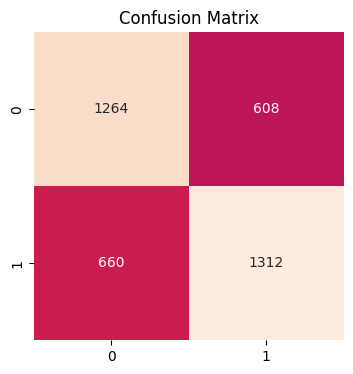

In [66]:
cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True,fmt='g',vmin=0,cbar=False)
plt.title('Confusion Matrix')
plt.show()

# Clasification Report

In [67]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      1872
         1.0       0.68      0.67      0.67      1972

    accuracy                           0.67      3844
   macro avg       0.67      0.67      0.67      3844
weighted avg       0.67      0.67      0.67      3844

